##  Prediction of Output Energy for a Combined Cycle Power Plant  


Combined-cycle power plants are compound gas turbine–steam turbine systems wherein the extreme hot exhaust from a gas turbine is employed to run a boiler, and the steam thus produced is fed into a steam turbine to generate power. These plants can deliver high power output at efficiencies as high as 50%–60% with low emissions and produce 50% more electricity than a simple-cycle plant consuming the same amount of fuel. Combined cycle power plants may be either single-shaft, wherein both of the gas turbine and steam turbine are connected to the same generator in a tandem arrangement, or multishaft, with each gas turbine and steam turbine driving a separate generator.

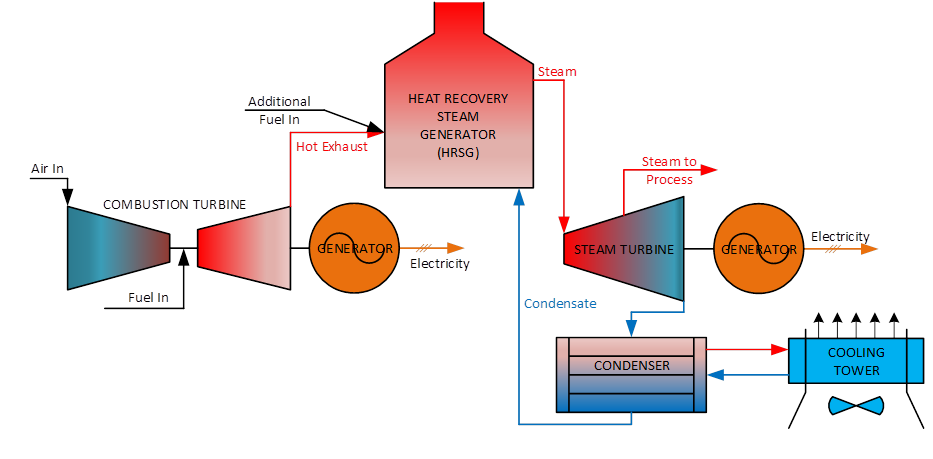

The term “combined cycle” refers to the combining of multiple thermodynamic cycles to generate power. Combined cycle operation employs a heat recovery steam generator (HRSG) that captures heat from high temperature exhaust gases to produce steam, which is then supplied to a steam turbine to generate additional electric power. In combined cycle mode, power plants can achieve electrical efficiencies of up to 60 percent. The process for creating steam to produce work using a steam turbine is based on the **Rankine cycle**.

### Import Necessary Libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

#### Import the Dataset

In [2]:
data = pd.read_csv(r'D:\Study Materials\Projects\energy_production.csv',sep=';')

In [3]:
data.head()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
0,9.59,38.56,1017.01,60.10,481.30
1,12.04,42.34,1019.72,94.67,465.36
2,13.87,45.08,1024.42,81.69,465.48
3,13.72,54.30,1017.89,79.08,467.05
4,15.14,49.64,1023.78,75.00,463.58


#### Data Description

The variables, or features, are the following:
* temperature, in degrees Celsius.
* exhaust_vacuum, in cm Hg.
* Ambient pressure  (amb_pressure) in millibar.
* Relative humidity (r_humidity) in percentage.,
* energy_production, in MW, net hourly electrical energy output.


#### Initial Analysis

In [4]:
data.isnull().sum()

temperature          0
exhaust_vacuum       0
amb_pressure         0
r_humidity           0
energy_production    0
dtype: int64

#### There is no null values present in the given dataset

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   temperature        9568 non-null   float64
 1   exhaust_vacuum     9568 non-null   float64
 2   amb_pressure       9568 non-null   float64
 3   r_humidity         9568 non-null   float64
 4   energy_production  9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


#### All the data is of float datatype 

In [6]:
data.describe()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


* Temperature variable ranges between 1.81 C - 37.11 C
* Exhaust vaccum variable ranges between 25.36 Hg - 81.56 Hg
* Ambient Pressure variable ranges between 992.89 millibar - 1033.30 millibar
* Relative Humidity variable ranges between 25.56 % - 100.16% 

### Exploratory Data Analysis

## Understanding Each Variable and Distribution

### Temperature 

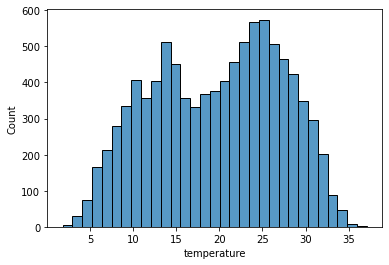

In [7]:
sns.histplot(data['temperature'])
plt.show()

In [8]:
data['temperature'].describe()

count    9568.000000
mean       19.651231
std         7.452473
min         1.810000
25%        13.510000
50%        20.345000
75%        25.720000
max        37.110000
Name: temperature, dtype: float64

In [9]:
data['temperature'].skew()

-0.1363930494749227

* Majority of the Temperature value falls between 13.51 to 25.72 
* The observations are concentrated around the mean
* Negatively skewed data indicates that extreme values are located towards the left and most of the values are present to the right of the mean
* Histogram shows a normal distribution

### Exhaust Vaccum

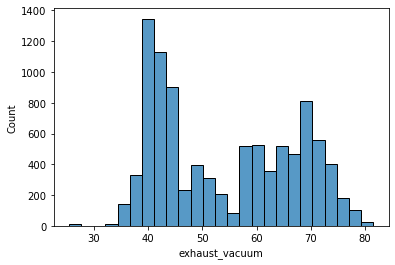

In [10]:
sns.histplot(data['exhaust_vacuum'])
plt.show()

In [11]:
data['exhaust_vacuum'].describe()

count    9568.000000
mean       54.305804
std        12.707893
min        25.360000
25%        41.740000
50%        52.080000
75%        66.540000
max        81.560000
Name: exhaust_vacuum, dtype: float64

In [12]:
data['exhaust_vacuum'].skew()

0.19852101136676173

* Majority of the Exhaust Vaccum value falls between 41.74 to 66.54 
* The observations are concentrated around the mean
* Positively skewed data indicates that extreme values are located towards the right and most of the values are present to the left of the mean
* Histogram shows a normal distribution

### Ambient Pressure

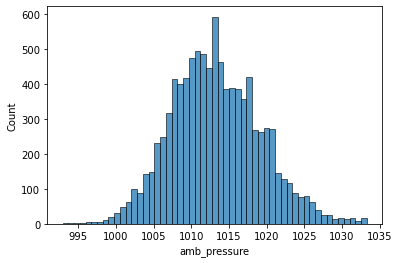

In [13]:
sns.histplot(data['amb_pressure'])
plt.show()

In [14]:
data['amb_pressure'].describe()

count    9568.000000
mean     1013.259078
std         5.938784
min       992.890000
25%      1009.100000
50%      1012.940000
75%      1017.260000
max      1033.300000
Name: amb_pressure, dtype: float64

In [15]:
data['amb_pressure'].skew()

0.26544469358258616

* Majority of the Exhaust Vaccum value falls between 1009.100 to 1017.260 
* The observations are concentrated around the mean
* Positively skewed data indicates that extreme values are located towards the right and most of the values are present to the left of the mean
* Histogram shows a normal distribution

### Relative Humidity

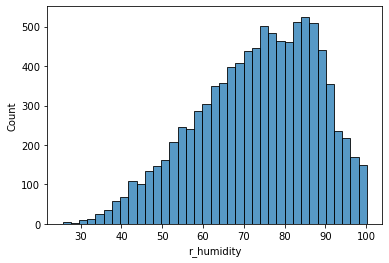

In [16]:
sns.histplot(data['r_humidity'])
plt.show()

In [17]:
data['r_humidity'].describe()

count    9568.000000
mean       73.308978
std        14.600269
min        25.560000
25%        63.327500
50%        74.975000
75%        84.830000
max       100.160000
Name: r_humidity, dtype: float64

In [18]:
data['r_humidity'].skew()

-0.4318387491833359

* Majority of the Exhaust Vaccum value falls between 63.327 to 84.830 
* The observations are concentrated around the mean
* Negatively skewed data indicates that extreme values are located towards the left and most of the values are present to the right of the mean
* Histogram shows a normal distribution

### Energy Production

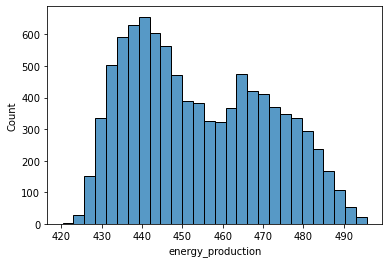

In [19]:
sns.histplot(data['energy_production'])
plt.show()

In [20]:
data['energy_production'].describe()

count    9568.000000
mean      454.365009
std        17.066995
min       420.260000
25%       439.750000
50%       451.550000
75%       468.430000
max       495.760000
Name: energy_production, dtype: float64

In [21]:
data['energy_production'].skew()

0.30650943542040227

* Majority of the Exhaust Vaccum value falls between 439.750 to 468.430 
* The observations are concentrated around the mean
* Positively skewed data indicates that extreme values are located towards the right and most of the values are present to the left of the mean
* Histogram shows a normal distribution

### Check For Outliers 

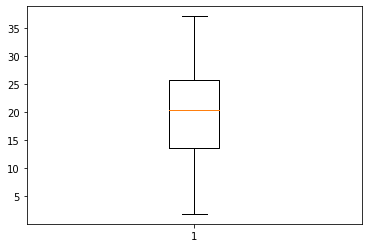

In [22]:
plt.boxplot(x='temperature',data=data)
plt.show()

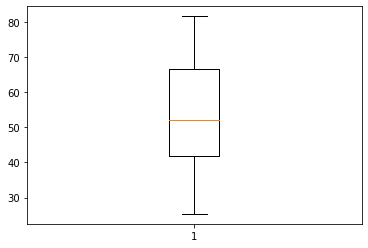

In [23]:
plt.boxplot(x='exhaust_vacuum',data=data)
plt.show()

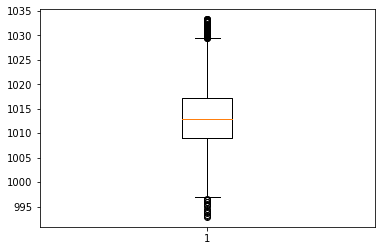

In [24]:
plt.boxplot(x='amb_pressure',data=data)
plt.show()

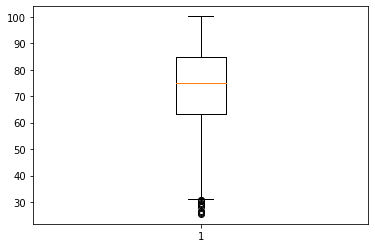

In [25]:
plt.boxplot(x='r_humidity',data=data)
plt.show()

#### Observation : There are no outliers present in temperature and exhaust vaccum and a few outliers are present in ambient pressure and relative humidity variable 

### Assumption Check for Data

#### 1. Check for Linearity 

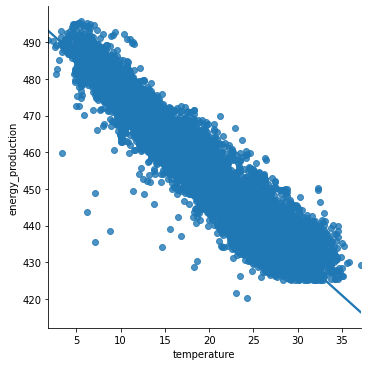

In [26]:
sns.lmplot(x='temperature',y='energy_production',data=data)
plt.show()

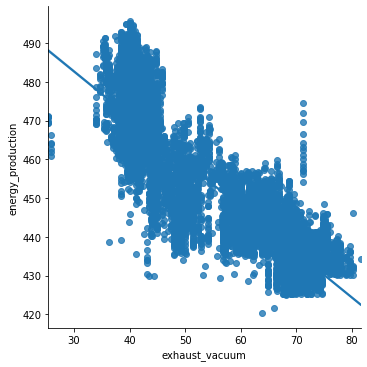

In [27]:
sns.lmplot(x='exhaust_vacuum',y='energy_production',data=data)
plt.show()

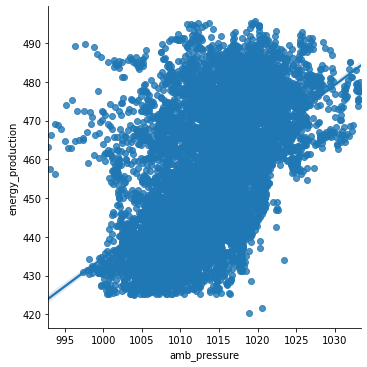

In [28]:
sns.lmplot(x='amb_pressure',y='energy_production',data=data)
plt.show()

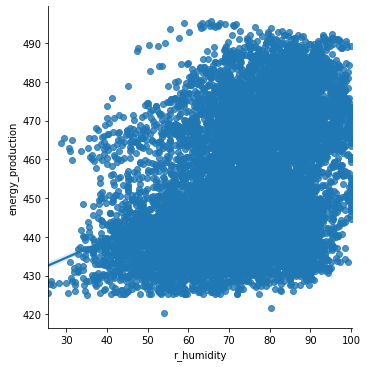

In [29]:
sns.lmplot(x='r_humidity',y='energy_production',data=data)
plt.show()

#### Observation : All of the input features are linearly co-related with my output

#### 2. Check for Normality Test

#### Normality Check with qqplot

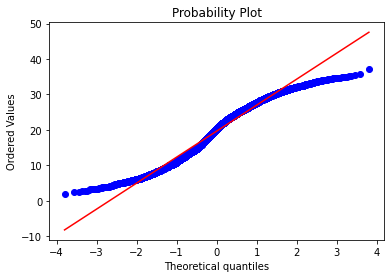

In [30]:
stats.probplot(x = data['temperature'],dist='norm',plot=plt)
plt.show()

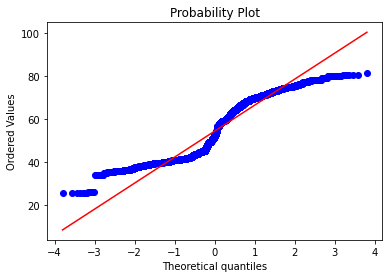

In [31]:
stats.probplot(x = data['exhaust_vacuum'],dist='norm',plot=plt)
plt.show()

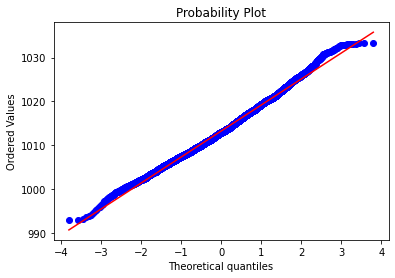

In [32]:
stats.probplot(x = data['amb_pressure'],dist='norm',plot=plt)
plt.show()

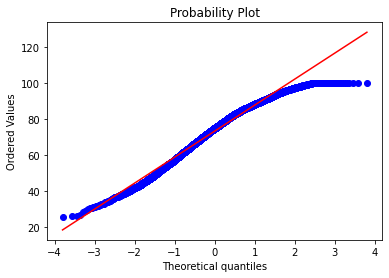

In [33]:
stats.probplot(x = data['r_humidity'],dist='norm',plot=plt)
plt.show()

#### Observation : Ambient_pressure and Relative Humidity pass the normality test 

#### 3. Check for Multi Collinearity

In [34]:
corr_matrix = data.corr()
corr_matrix

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
temperature,1.000000,0.844107,-0.507549,-0.542535,-0.948128
exhaust_vacuum,0.844107,1.000000,-0.413502,-0.312187,-0.869780
amb_pressure,-0.507549,-0.413502,1.000000,0.099574,0.518429
r_humidity,-0.542535,-0.312187,0.099574,1.000000,0.389794
energy_production,-0.948128,-0.869780,0.518429,0.389794,1.000000


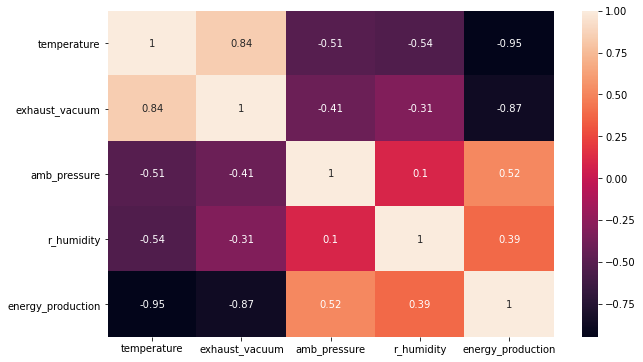

In [35]:
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix,annot=True)
plt.show()

*  *Temperature* and *Exhaust Vaccum* has a **Strong Negative Co-relation** between with the output variable *Energy_production*
* *Ambient_pressure* and *Relative_Humidity* has **Weak Positive Co-relation** with the output variable *Energy_production*

#### 4. No Auto Regression -  Test Passed 

In [36]:
energy_data = data.copy()

In [37]:
energy_data

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
0,9.59,38.56,1017.01,60.10,481.30
1,12.04,42.34,1019.72,94.67,465.36
2,13.87,45.08,1024.42,81.69,465.48
3,13.72,54.30,1017.89,79.08,467.05
4,15.14,49.64,1023.78,75.00,463.58
...,...,...,...,...,...
9563,17.10,49.69,1005.53,81.82,457.32
9564,24.73,65.34,1015.42,52.80,446.92
9565,30.44,56.24,1005.19,56.24,429.34
9566,23.00,66.05,1020.61,80.29,421.57


#### Dividing the data into train and test data and also as X(dependent variable) and Y ( Target Variable)

In [38]:
X = energy_data.iloc[:,:-1]
X

,temperature,exhaust_vacuum,amb_pressure,r_humidity
0,9.59,38.56,1017.01,60.10
1,12.04,42.34,1019.72,94.67
2,13.87,45.08,1024.42,81.69
3,13.72,54.30,1017.89,79.08
4,15.14,49.64,1023.78,75.00
...,...,...,...,...
9563,17.10,49.69,1005.53,81.82
9564,24.73,65.34,1015.42,52.80
9565,30.44,56.24,1005.19,56.24
9566,23.00,66.05,1020.61,80.29


In [39]:
Y = energy_data.loc[:,'energy_production']
Y

0       481.30
1       465.36
2       465.48
3       467.05
4       463.58
         ...  
9563    457.32
9564    446.92
9565    429.34
9566    421.57
9567    454.41
Name: energy_production, Length: 9568, dtype: float64

#### Dividing the training data as 70% and testing data as 30%

In [40]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.7,random_state=21)

In [41]:
x_train.shape,y_train.shape

((2870, 4), (2870,))

In [42]:
x_test.shape,y_test.shape

((6698, 4), (6698,))